## Quiz #0401

### "Optimal number of clusters for K-means clustering"

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [8]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [44]:
#prepare the kmeans , centers and clusters
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
centers = kmeans.cluster_centers_
clusters = kmeans.labels_


In [50]:
#the function 

def total_internal_ss(X, centers, clusters):
    
    N_clusters = centers.shape[0] #nb of clusters
    N_columns = centers.shape[1]  #nb of clmns = nb of centers
    N_rows = X.shape[0]  #nb of rows
    
    #initialise the array
    closest_centers = np.zeros((N_rows, N_columns))
    
    #fill the array
    for n in range(N_clusters):
        
        i = (clusters == n)
        for j in range(N_columns):
            closest_centers[i,j] = centers[n,j] 
            
            
    return np.sum((X-closest_centers)**2)

total_internal_ss(X, centers, clusters)

2711.6662578322535

2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

In [55]:
#Visualisation 

n_cluster = np.array(range(1,15)) # Array that contains the number of clusters.
total_ss = np.array([]) # Array that will contain the total internal sum of squares.

In [56]:
for n in n_cluster:
    
    kmeans = KMeans(n_clusters=n) 
    clusters = kmeans.fit(X).labels_
    centers = kmeans.cluster_centers_
    total_ss = np.append(total_ss, total_internal_ss(X,centers,clusters))
    


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


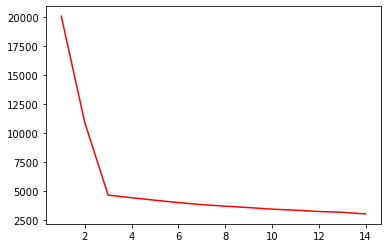

In [57]:
plt.plot(n_cluster,total_ss,color='red')
plt.show()

the optimal number of clusters is 3 

it is the same as expected